In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [2]:
range(100)

range(0, 100)

In [3]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [4]:
len(train_loader), len(val_loader), len(test_loader)

(78, 25, 25)

In [5]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180324, rec:003, time:2509.0


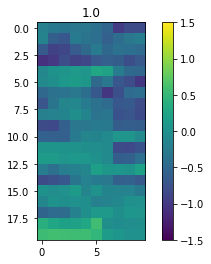

date:180324, rec:008, time:3028.0


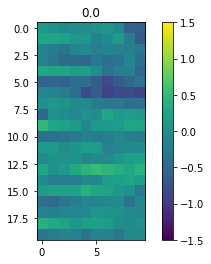

date:180323, rec:004, time:4579.0


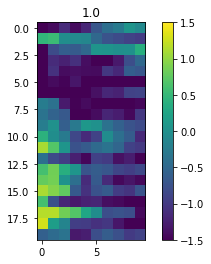

date:180324, rec:001, time:2021.0


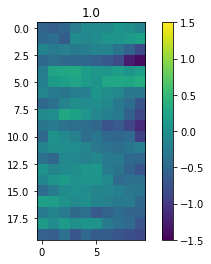

date:180401, rec:001, time:3976.0


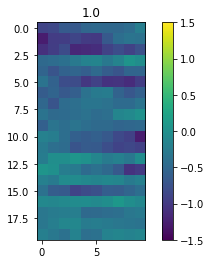

date:180325, rec:009, time:3196.0


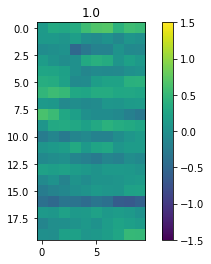

date:180322, rec:005, time:3171.0


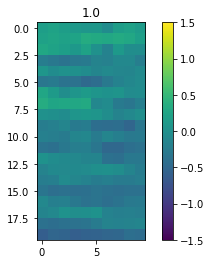

date:180324, rec:001, time:3545.0


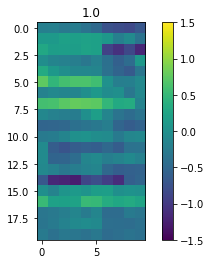

date:180325, rec:006, time:5740.0


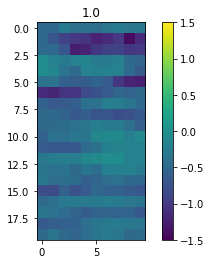

date:180324, rec:006, time:2011.0


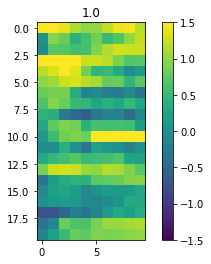

date:180324, rec:004, time:3102.0


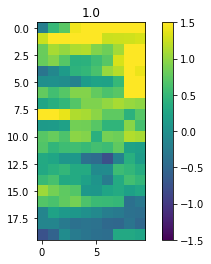

date:180324, rec:006, time:5873.0


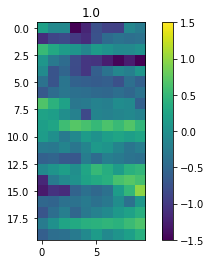

date:180325, rec:007, time:4883.0


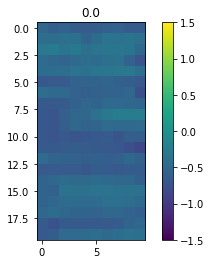

date:180401, rec:001, time:1020.0


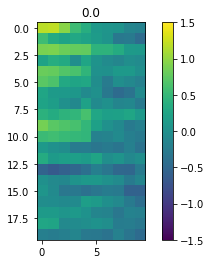

date:180325, rec:004, time:5687.0


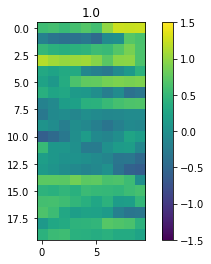

date:180322, rec:007, time:1437.0


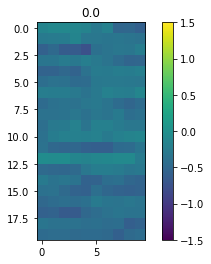

date:180325, rec:005, time:4403.0


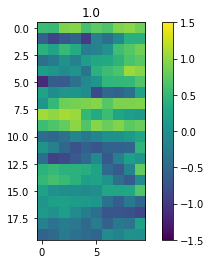

date:180323, rec:003, time:1447.0


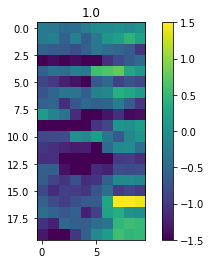

date:180325, rec:009, time:2726.0


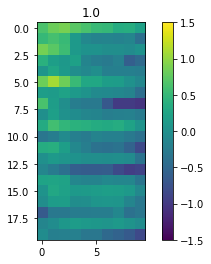

date:180325, rec:003, time:4902.0


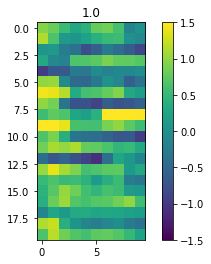

date:180401, rec:002, time:3146.0


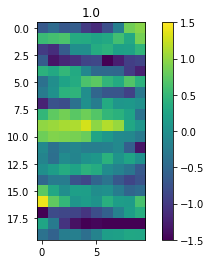

date:180325, rec:007, time:4343.0


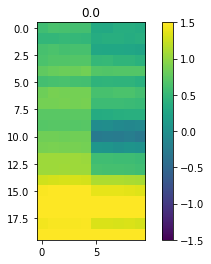

date:180325, rec:001, time:6280.0


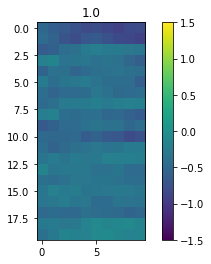

date:180325, rec:001, time:610.0


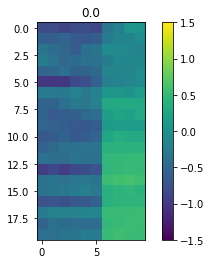

date:180325, rec:001, time:2751.0


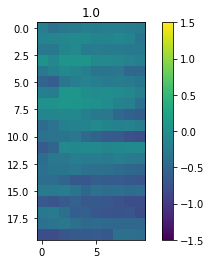

date:180325, rec:005, time:1334.0


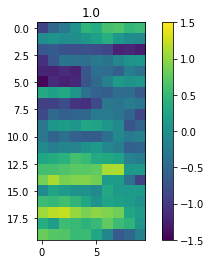

date:180324, rec:008, time:3713.0


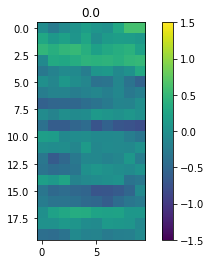

date:180324, rec:009, time:210.0


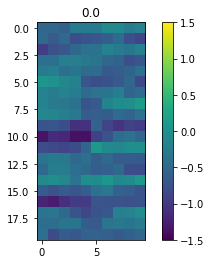

date:180325, rec:001, time:6080.0


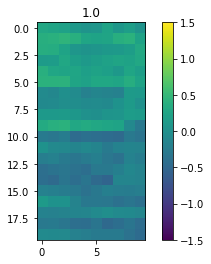

date:180325, rec:007, time:3819.0


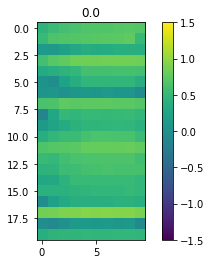

date:180401, rec:002, time:4136.0


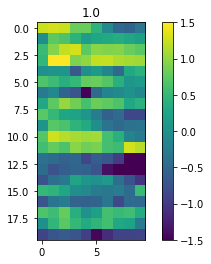

date:180325, rec:004, time:5747.0


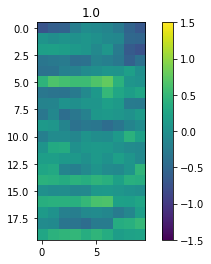

date:180322, rec:005, time:6084.0


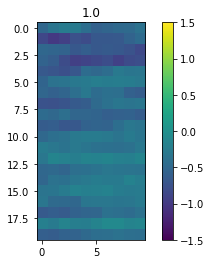

date:180324, rec:004, time:5299.0


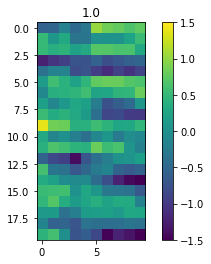

date:180324, rec:008, time:3663.0


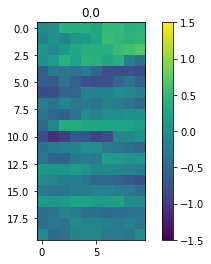

date:180401, rec:003, time:960.0


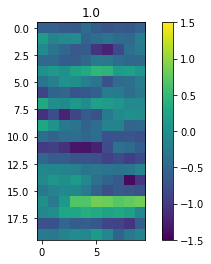

date:180323, rec:005, time:3983.0


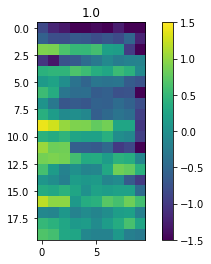

date:180401, rec:001, time:1970.0


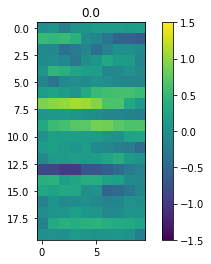

date:180325, rec:007, time:4953.0


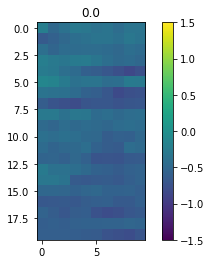

date:180325, rec:007, time:2596.0


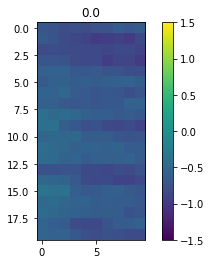

date:180401, rec:001, time:740.0


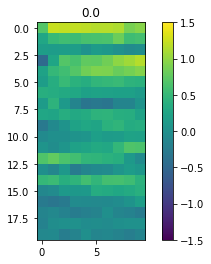

date:180322, rec:007, time:4360.0


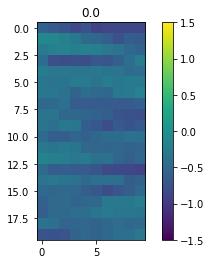

date:180401, rec:001, time:1040.0


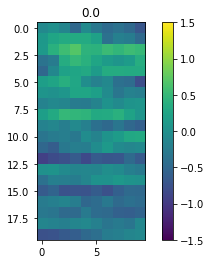

date:180324, rec:001, time:1502.0


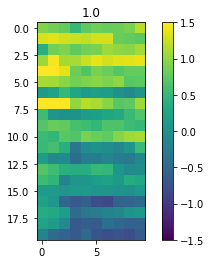

date:180323, rec:001, time:770.0


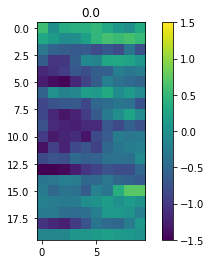

date:180401, rec:001, time:460.0


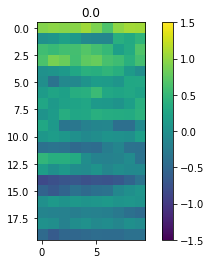

date:180325, rec:002, time:4338.0


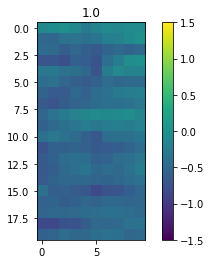

date:180324, rec:004, time:3434.0


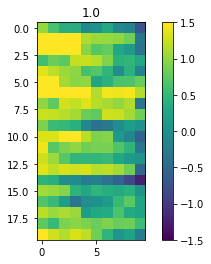

date:180324, rec:009, time:1057.0


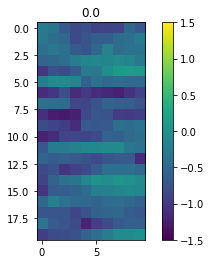

date:180325, rec:009, time:1380.0


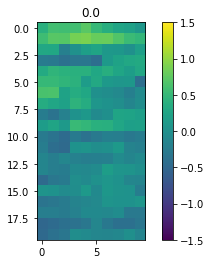

date:180325, rec:009, time:6922.0


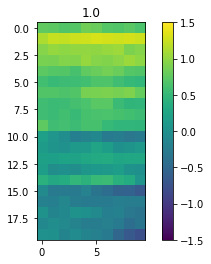

date:180325, rec:001, time:110.0


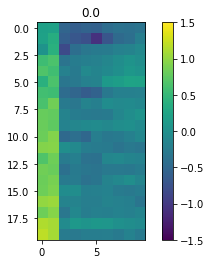

date:180322, rec:007, time:4580.0


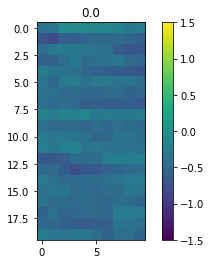

date:180322, rec:005, time:2701.0


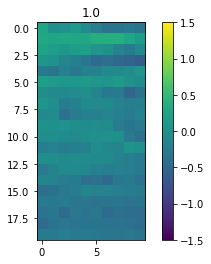

date:180401, rec:001, time:1610.0


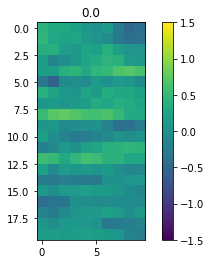

date:180322, rec:007, time:4660.0


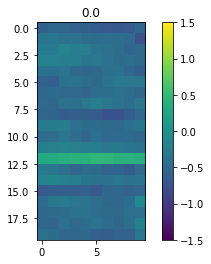

date:180325, rec:001, time:6871.0


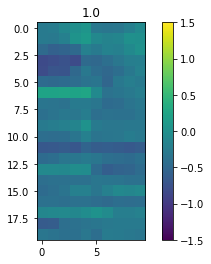

date:180324, rec:008, time:5664.0


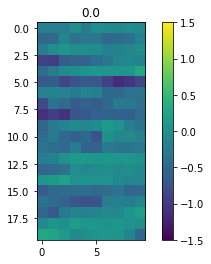

date:180325, rec:004, time:2218.0


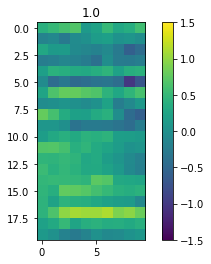

date:180325, rec:009, time:4659.0


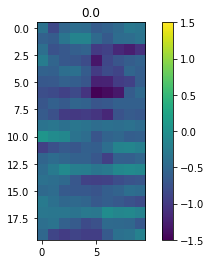

date:180324, rec:005, time:6086.0


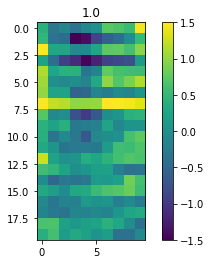

date:180324, rec:003, time:2647.0


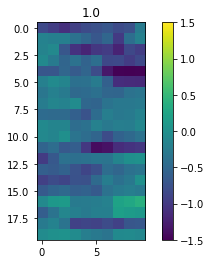

date:180325, rec:006, time:2002.0


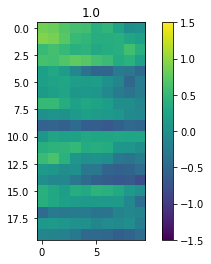

date:180322, rec:005, time:2025.0


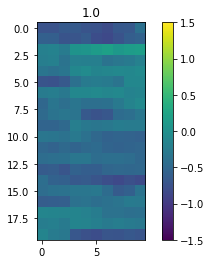

date:180325, rec:009, time:6109.0


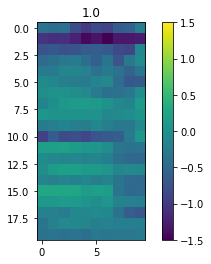

date:180401, rec:001, time:1740.0


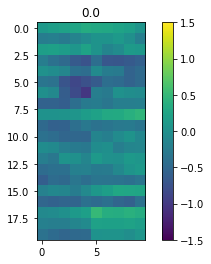

date:180325, rec:009, time:6480.0


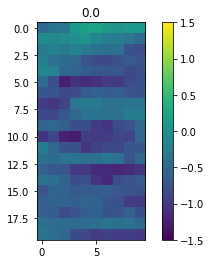

date:180325, rec:004, time:1238.0


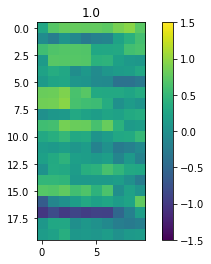

date:180325, rec:009, time:2080.0


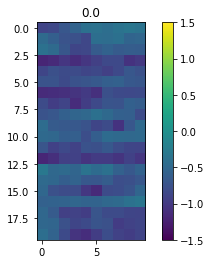

date:180401, rec:001, time:5407.0


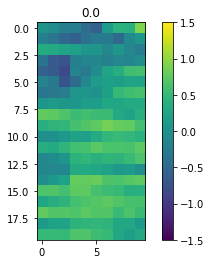

date:180401, rec:001, time:1050.0


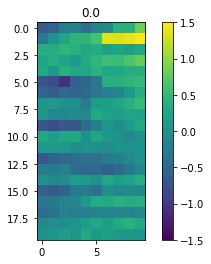

date:180325, rec:004, time:6127.0


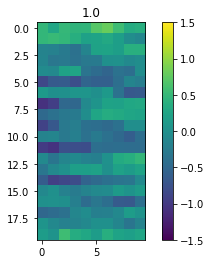

date:180325, rec:007, time:4853.0


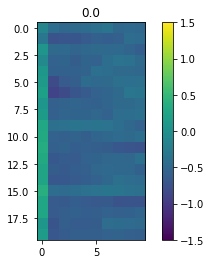

date:180324, rec:009, time:380.0


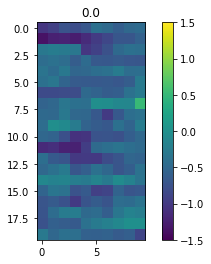

date:180322, rec:007, time:1697.0


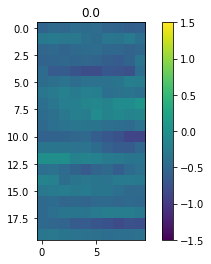

date:180323, rec:007, time:5701.0


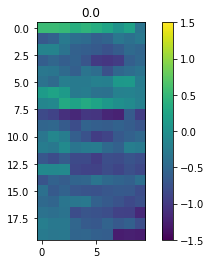

date:180323, rec:007, time:3025.0


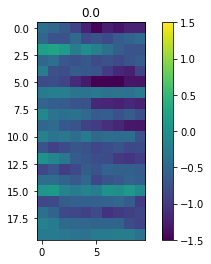

date:180323, rec:002, time:4875.0


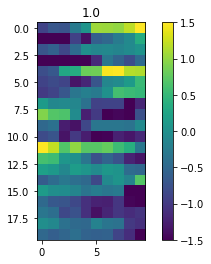

date:180325, rec:007, time:2676.0


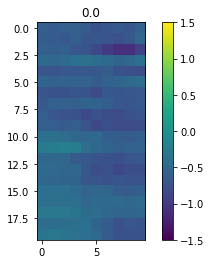

date:180401, rec:001, time:5287.0


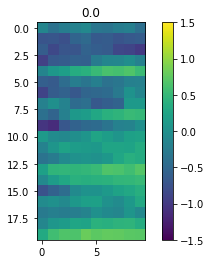

date:180325, rec:005, time:3739.0


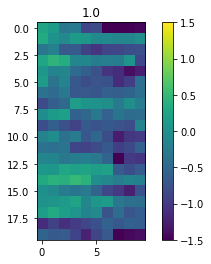

date:180325, rec:001, time:5016.0


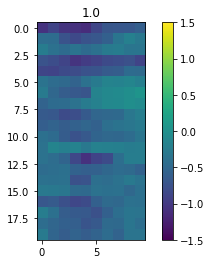

date:180325, rec:006, time:3373.0


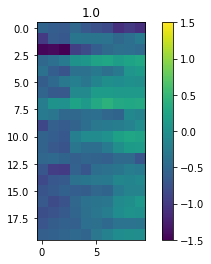

date:180401, rec:001, time:1550.0


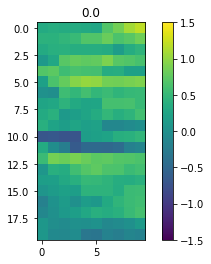

date:180322, rec:005, time:1595.0


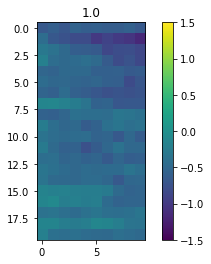

date:180324, rec:001, time:898.0


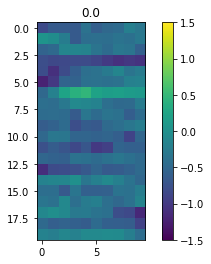

date:180323, rec:004, time:3153.0


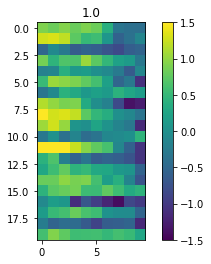

date:180324, rec:006, time:6893.0


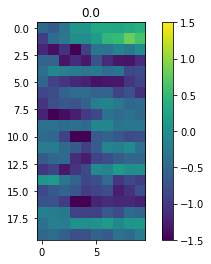

date:180323, rec:002, time:4286.0


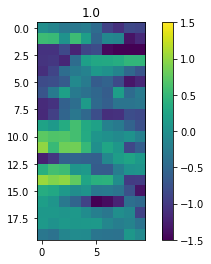

date:180323, rec:007, time:2795.0


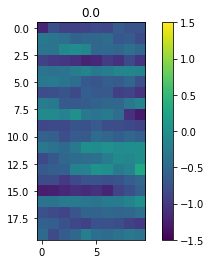

date:180325, rec:009, time:2440.0


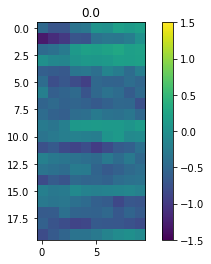

date:180324, rec:008, time:793.0


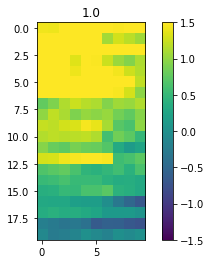

date:180325, rec:009, time:1710.0


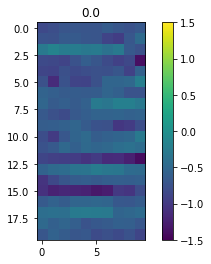

date:180322, rec:005, time:2372.0


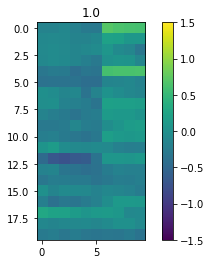

date:180325, rec:007, time:4833.0


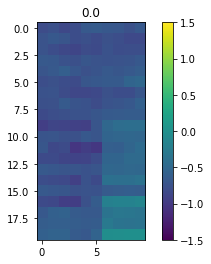

date:180325, rec:007, time:4763.0


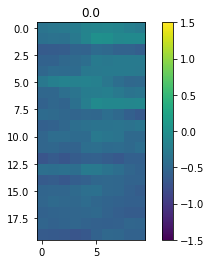

date:180324, rec:005, time:5966.0


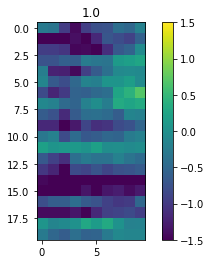

date:180325, rec:009, time:210.0


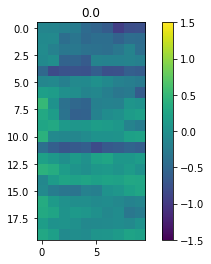

date:180324, rec:006, time:6913.0


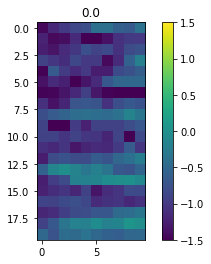

date:180401, rec:002, time:2376.0


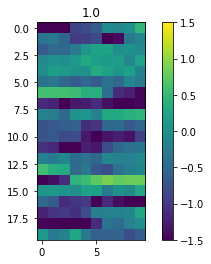

date:180325, rec:009, time:870.0


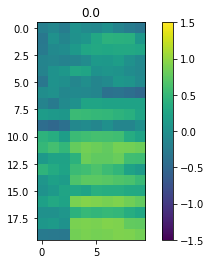

date:180325, rec:007, time:5813.0


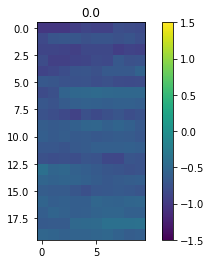

date:180324, rec:008, time:5504.0


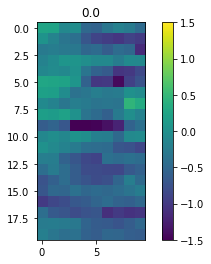

date:180322, rec:007, time:5110.0


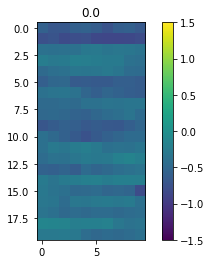

date:180324, rec:008, time:973.0


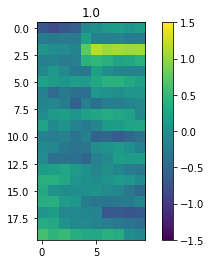

date:180324, rec:003, time:3877.0


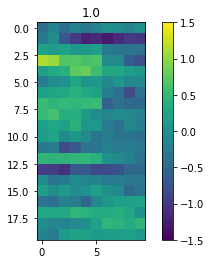

date:180325, rec:006, time:3823.0


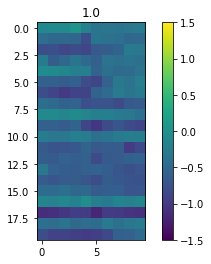

date:180325, rec:007, time:4833.0


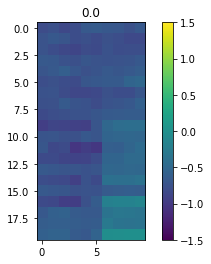

date:180325, rec:004, time:517.0


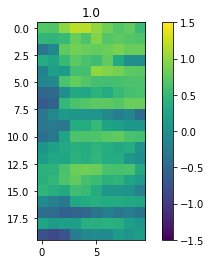

date:180325, rec:001, time:4586.0


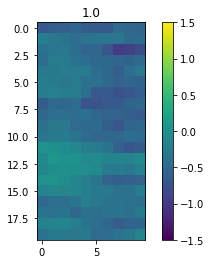

date:180323, rec:007, time:5671.0


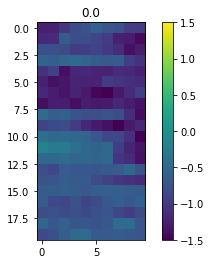

date:180322, rec:004, time:411.0


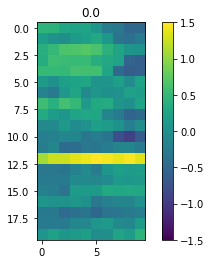

date:180324, rec:003, time:120.0


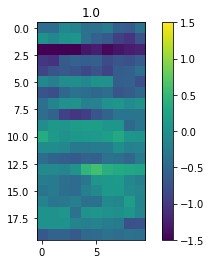

date:180322, rec:007, time:2233.0


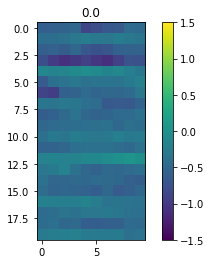

date:180324, rec:008, time:3573.0


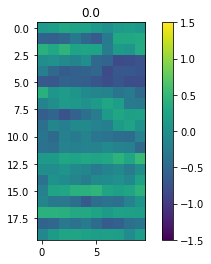

date:180324, rec:008, time:5914.0


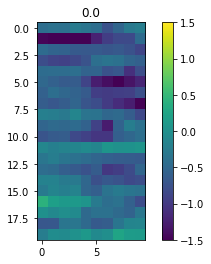

date:180325, rec:009, time:2050.0


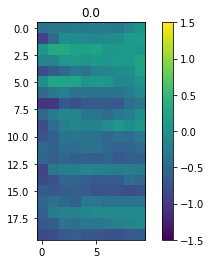

date:180323, rec:002, time:3929.0


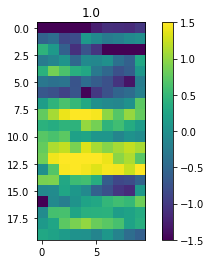

date:180325, rec:004, time:1728.0


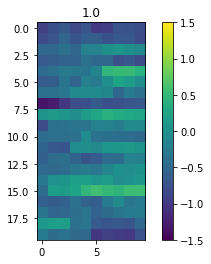

date:180325, rec:009, time:4559.0


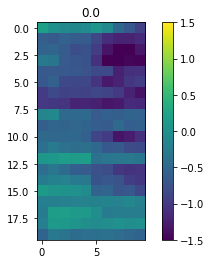

date:180325, rec:006, time:3283.0


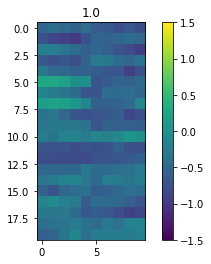

date:180323, rec:006, time:1526.0


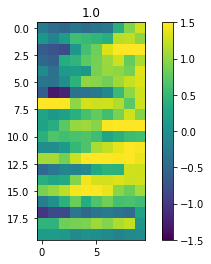

date:180325, rec:002, time:6245.0


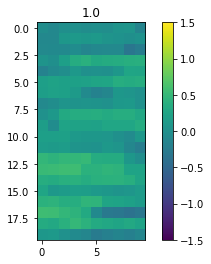

date:180324, rec:003, time:5158.0


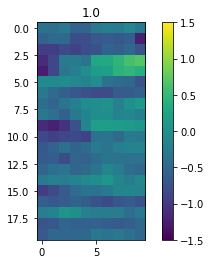

date:180325, rec:009, time:20.0


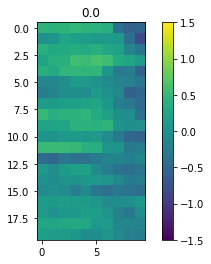

date:180325, rec:007, time:6103.0


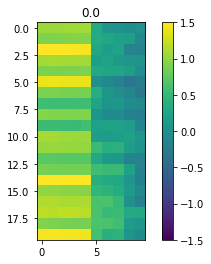

date:180324, rec:006, time:5913.0


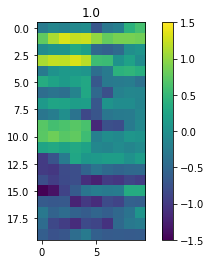

date:180322, rec:003, time:3488.0


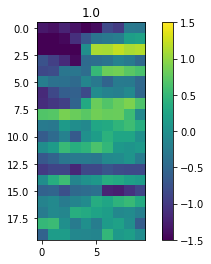

In [15]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0][60:80]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [20]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha=0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'




Train loss for epoch 0: 0.5394309163093567
Val loss for epoch 0: 0.5242105722427368
Train loss for epoch 1: 0.5064108967781067
Val loss for epoch 1: 0.5126606822013855
1
Train loss for epoch 2: 0.49970361590385437
Val loss for epoch 2: 0.4954843521118164
2
Train loss for epoch 3: 0.49169081449508667
Val loss for epoch 3: 0.5042272806167603
Train loss for epoch 4: 0.48560631275177
Val loss for epoch 4: 0.5036194920539856
Train loss for epoch 5: 0.48187056183815
Val loss for epoch 5: 0.47766193747520447
5
Train loss for epoch 6: 0.4762701988220215
Val loss for epoch 6: 0.47116541862487793
6
Train loss for epoch 7: 0.4730013906955719
Val loss for epoch 7: 0.47355103492736816
Train loss for epoch 8: 0.46928027272224426
Val loss for epoch 8: 0.47200825810432434
Train loss for epoch 9: 0.46603140234947205
Val loss for epoch 9: 0.46047502756118774
9
Train loss for epoch 10: 0.46240097284317017
Val loss for epoch 10: 0.45849108695983887
10
Train loss for epoch 11: 0.46053463220596313
Val loss 

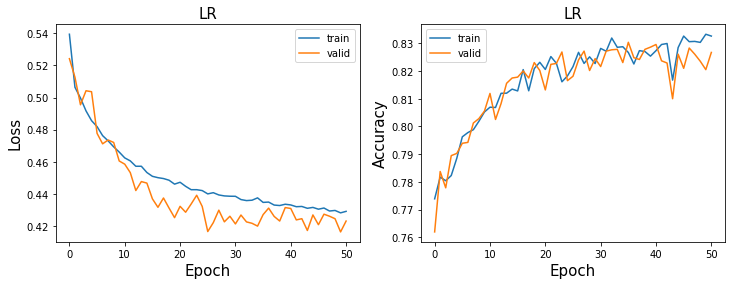

In [7]:

model = GLM(input_dim=6*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)

    if train_loss < tol:
        break
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [28]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'




Train loss for epoch 0: 0.5340758562088013
Val loss for epoch 0: 0.5275569558143616
Train loss for epoch 1: 0.5118884444236755
Val loss for epoch 1: 0.5196655988693237
1
Train loss for epoch 2: 0.5031949877738953
Val loss for epoch 2: 0.5057364702224731
2
Train loss for epoch 3: 0.49606236815452576
Val loss for epoch 3: 0.496577650308609
3
Train loss for epoch 4: 0.49034371972084045
Val loss for epoch 4: 0.5024155974388123
Train loss for epoch 5: 0.48574554920196533
Val loss for epoch 5: 0.49000078439712524
5
Train loss for epoch 6: 0.4824013113975525
Val loss for epoch 6: 0.47085055708885193
6
Train loss for epoch 7: 0.47750407457351685
Val loss for epoch 7: 0.47065383195877075
7
Train loss for epoch 8: 0.4735875725746155
Val loss for epoch 8: 0.4741857647895813
Train loss for epoch 9: 0.4706418812274933
Val loss for epoch 9: 0.4588557481765747
9
Train loss for epoch 10: 0.4706791937351227
Val loss for epoch 10: 0.4534915089607239
10
Train loss for epoch 11: 0.465747594833374
Val loss

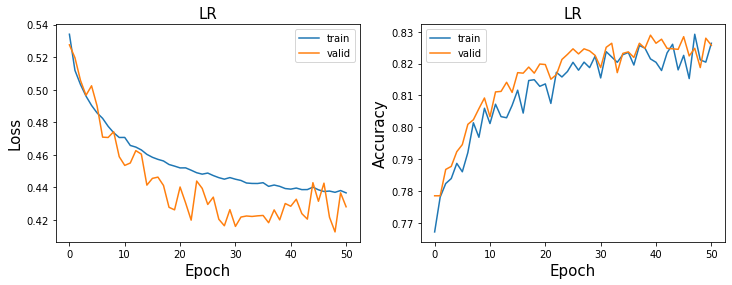

Train loss for epoch 0: 0.5376428961753845
Val loss for epoch 0: 0.5194346308708191
Train loss for epoch 1: 0.5115942358970642
Val loss for epoch 1: 0.5278687477111816
Train loss for epoch 2: 0.5031393766403198
Val loss for epoch 2: 0.5247352719306946
Train loss for epoch 3: 0.4956299662590027
Val loss for epoch 3: 0.4979681670665741
3
Train loss for epoch 4: 0.4925220012664795
Val loss for epoch 4: 0.4880550503730774
4
Train loss for epoch 5: 0.48570650815963745
Val loss for epoch 5: 0.4813171625137329
5
Train loss for epoch 6: 0.48386892676353455
Val loss for epoch 6: 0.4754944145679474
6
Train loss for epoch 7: 0.4785277545452118
Val loss for epoch 7: 0.4657406806945801
7
Train loss for epoch 8: 0.47481101751327515
Val loss for epoch 8: 0.47246503829956055
Train loss for epoch 9: 0.4721360504627228
Val loss for epoch 9: 0.4539240300655365
9
Train loss for epoch 10: 0.4691811203956604
Val loss for epoch 10: 0.4570811688899994
Train loss for epoch 11: 0.46842193603515625
Val loss for 

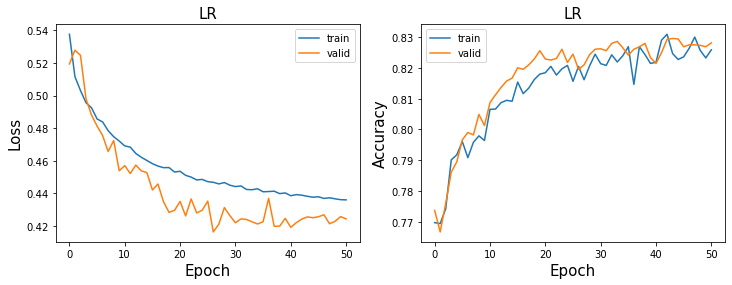

Train loss for epoch 0: 0.5467093586921692
Val loss for epoch 0: 0.5265792608261108
Train loss for epoch 1: 0.5120149254798889
Val loss for epoch 1: 0.5098370909690857
1
Train loss for epoch 2: 0.5048268437385559
Val loss for epoch 2: 0.5055615901947021
2
Train loss for epoch 3: 0.4957084655761719
Val loss for epoch 3: 0.5018839836120605
3
Train loss for epoch 4: 0.49025678634643555
Val loss for epoch 4: 0.49472007155418396
4
Train loss for epoch 5: 0.48668915033340454
Val loss for epoch 5: 0.48615357279777527
5
Train loss for epoch 6: 0.4814741015434265
Val loss for epoch 6: 0.4762677252292633
6
Train loss for epoch 7: 0.4778539836406708
Val loss for epoch 7: 0.4708854854106903
7
Train loss for epoch 8: 0.4745917320251465
Val loss for epoch 8: 0.4646226167678833
8
Train loss for epoch 9: 0.4709711968898773
Val loss for epoch 9: 0.46038299798965454
9
Train loss for epoch 10: 0.4687807261943817
Val loss for epoch 10: 0.45590975880622864
10
Train loss for epoch 11: 0.46611031889915466
Va

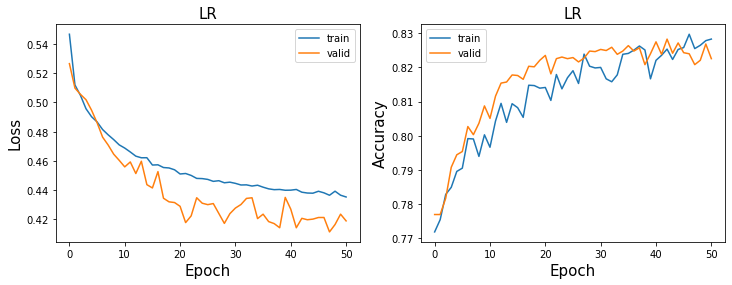

In [30]:
for alpha in alphas: 
    model = GLM(input_dim=100*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [31]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         48
50        37
100       47


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGnone1_EPOCH48_REDUCEsum.pt


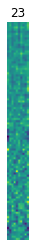

validation loss:0.41262921690940857 accuracy:0.8187460216422661
0.7856461
date:180327, rec:002, time:5904.0, label:1.0
Original data 62 CH


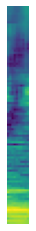

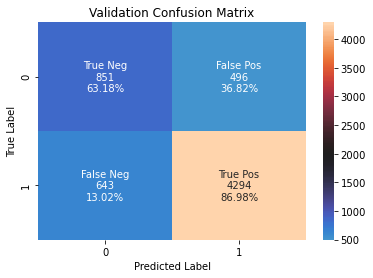

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGnone50_EPOCH37_REDUCEsum.pt


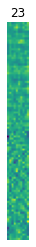

validation loss:0.41643834114074707 accuracy:0.8161998726925526
0.7856461
date:180327, rec:002, time:5904.0, label:1.0
Original data 62 CH


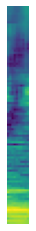

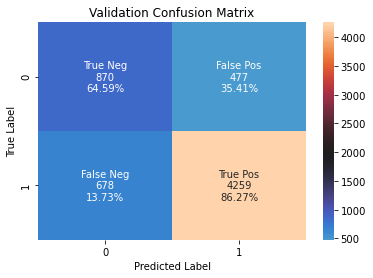

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGnone100_EPOCH47_REDUCEsum.pt


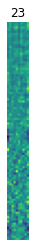

validation loss:0.4113878011703491 accuracy:0.8208147676639084
0.7856461
date:180327, rec:002, time:5904.0, label:1.0
Original data 62 CH


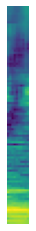

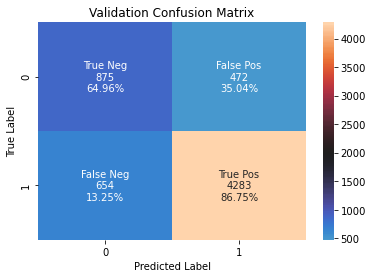

In [32]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic regression with L2 regularization

In [13]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1, 50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'





Train loss for epoch 0: 0.6396193504333496
Val loss for epoch 0: 0.6019236445426941
Train loss for epoch 1: 0.5711784362792969
Val loss for epoch 1: 0.5627136826515198
1
Train loss for epoch 2: 0.5637912750244141
Val loss for epoch 2: 0.5509007573127747
2
Train loss for epoch 3: 0.5607175827026367
Val loss for epoch 3: 0.542815625667572
3
Train loss for epoch 4: 0.5563920140266418
Val loss for epoch 4: 0.5312071442604065
4
Train loss for epoch 5: 0.5535624623298645
Val loss for epoch 5: 0.5332205891609192
Train loss for epoch 6: 0.5516492128372192
Val loss for epoch 6: 0.5344566702842712
Train loss for epoch 7: 0.5490636825561523
Val loss for epoch 7: 0.5142513513565063
7
Train loss for epoch 8: 0.5482687950134277
Val loss for epoch 8: 0.5025997757911682
8
Train loss for epoch 9: 0.5454397201538086
Val loss for epoch 9: 0.5010797381401062
9
Train loss for epoch 10: 0.5447154641151428
Val loss for epoch 10: 0.5016207098960876
Train loss for epoch 11: 0.5439316034317017
Val loss for epoc

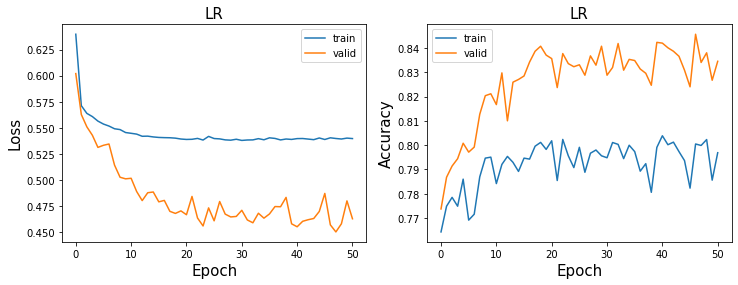

Train loss for epoch 0: 0.7017682194709778
Val loss for epoch 0: 0.6229722499847412
Train loss for epoch 1: 0.5990301966667175
Val loss for epoch 1: 0.5968411564826965
1
Train loss for epoch 2: 0.5941393971443176
Val loss for epoch 2: 0.5801873207092285
2
Train loss for epoch 3: 0.5914579033851624
Val loss for epoch 3: 0.5788956880569458
3
Train loss for epoch 4: 0.587306559085846
Val loss for epoch 4: 0.5824933052062988
Train loss for epoch 5: 0.5850963592529297
Val loss for epoch 5: 0.5447710752487183
5
Train loss for epoch 6: 0.5838325619697571
Val loss for epoch 6: 0.5462124347686768
Train loss for epoch 7: 0.5807250142097473
Val loss for epoch 7: 0.548590898513794
Train loss for epoch 8: 0.5789968967437744
Val loss for epoch 8: 0.5386425256729126
8
Train loss for epoch 9: 0.5781777501106262
Val loss for epoch 9: 0.5278681516647339
9
Train loss for epoch 10: 0.5771348476409912
Val loss for epoch 10: 0.5415382385253906
Train loss for epoch 11: 0.5758535265922546
Val loss for epoch 1

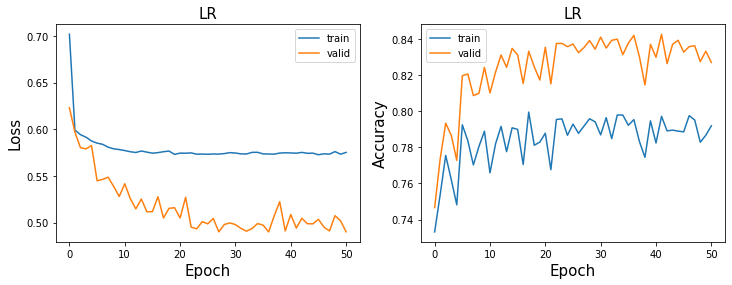

In [9]:
for alpha in alphas:
    model = GLM(input_dim=100*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [10]:
alpha

100

In [14]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         35
50        47
100       36


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH35_REDUCEsum.pt


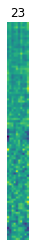

train loss:0.48123639822006226 accuracy:0.8065822784810126
0.5


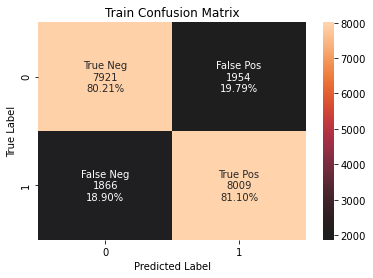

validation loss:0.4205614924430847 accuracy:0.8260661998726926
0.7856461


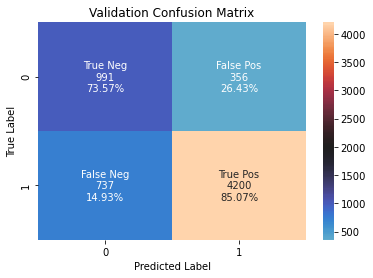

date:180327, rec:002, time:5904.0, label:1.0
Original data 62 CH


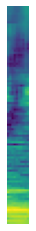

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH47_REDUCEsum.pt


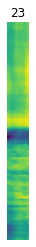

train loss:0.5579005479812622 accuracy:0.7924556962025316
0.5


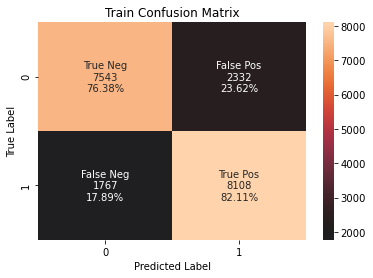

validation loss:0.4502236247062683 accuracy:0.8340229153405474
0.7856461


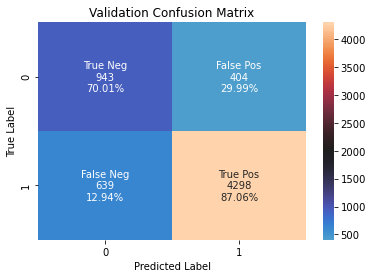

date:180327, rec:002, time:4533.0, label:1.0
Original data 62 CH


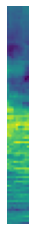

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH36_REDUCEsum.pt


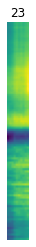

train loss:0.5889664888381958 accuracy:0.7881518987341772
0.5


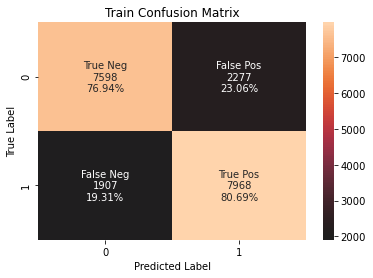

validation loss:0.489937424659729 accuracy:0.8418204964990452
0.7856461


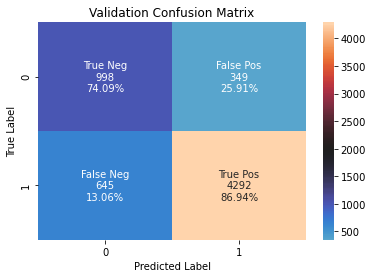

date:180327, rec:002, time:4533.0, label:1.0
Original data 62 CH


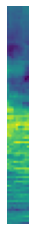

In [16]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    

    
    ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    

    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization

In [17]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'



Train loss for epoch 0: 0.6649050712585449
Val loss for epoch 0: 0.5476649403572083
Train loss for epoch 1: 0.5413334965705872
Val loss for epoch 1: 0.5351265668869019
1
Train loss for epoch 2: 0.536870002746582
Val loss for epoch 2: 0.5304475426673889
2
Train loss for epoch 3: 0.532920777797699
Val loss for epoch 3: 0.5236676931381226
3
Train loss for epoch 4: 0.5301058292388916
Val loss for epoch 4: 0.5064865946769714
4
Train loss for epoch 5: 0.5299449563026428
Val loss for epoch 5: 0.5014715790748596
5
Train loss for epoch 6: 0.525507926940918
Val loss for epoch 6: 0.4945605397224426
6
Train loss for epoch 7: 0.5225885510444641
Val loss for epoch 7: 0.4965592920780182
Train loss for epoch 8: 0.520392119884491
Val loss for epoch 8: 0.476363867521286
8
Train loss for epoch 9: 0.5225371718406677
Val loss for epoch 9: 0.48204749822616577
Train loss for epoch 10: 0.5185116529464722
Val loss for epoch 10: 0.4623059630393982
10
Train loss for epoch 11: 0.5184979438781738
Val loss for epoc

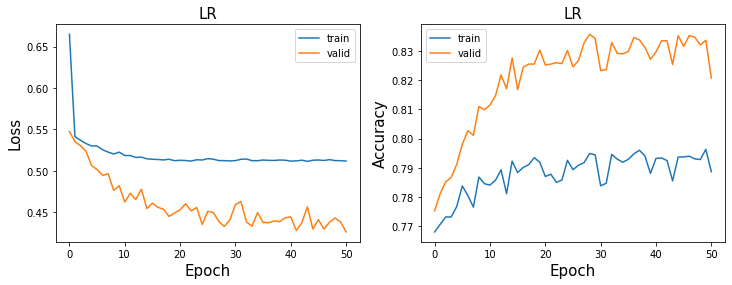

Train loss for epoch 0: 0.7105481028556824
Val loss for epoch 0: 0.5445554256439209
Train loss for epoch 1: 0.5479636788368225
Val loss for epoch 1: 0.5518473386764526
Train loss for epoch 2: 0.5459925532341003
Val loss for epoch 2: 0.5214644074440002
2
Train loss for epoch 3: 0.5421180725097656
Val loss for epoch 3: 0.5130241513252258
3
Train loss for epoch 4: 0.5405420660972595
Val loss for epoch 4: 0.509002149105072
4
Train loss for epoch 5: 0.537496030330658
Val loss for epoch 5: 0.5038363337516785
5
Train loss for epoch 6: 0.5367068648338318
Val loss for epoch 6: 0.4898042678833008
6
Train loss for epoch 7: 0.533835232257843
Val loss for epoch 7: 0.49334031343460083
Train loss for epoch 8: 0.5332965850830078
Val loss for epoch 8: 0.4889918267726898
8
Train loss for epoch 9: 0.5321589112281799
Val loss for epoch 9: 0.4912230372428894
Train loss for epoch 10: 0.5305306911468506
Val loss for epoch 10: 0.4798918664455414
10
Train loss for epoch 11: 0.529731273651123
Val loss for epoch

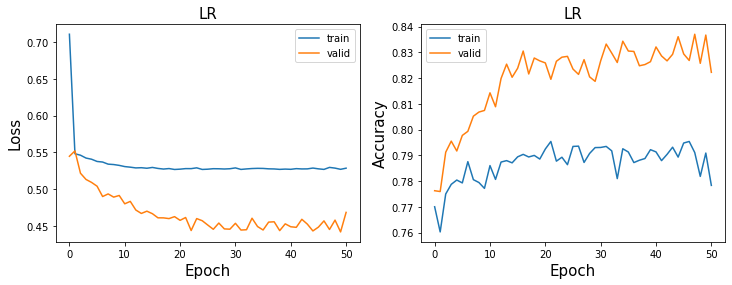

In [6]:
for alpha in alphas:
    model = GLM(input_dim=100*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [7]:
alpha

100

In [18]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         49
50        50
100       49


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH49_REDUCEsum.pt


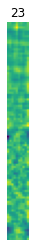

train loss:0.49053511023521423 accuracy:0.810632911392405
0.5


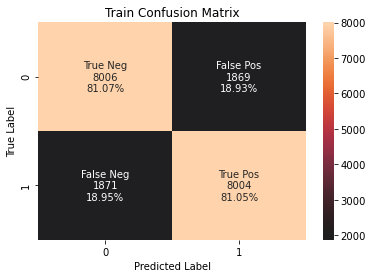

validation loss:0.41644707322120667 accuracy:0.8348185868873329
0.7856461


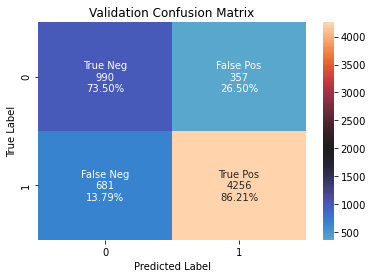

date:180327, rec:002, time:5904.0, label:1.0
Original data 62 CH


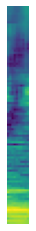

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH50_REDUCEsum.pt


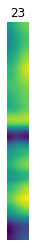

train loss:0.5295284986495972 accuracy:0.7878481012658228
0.5


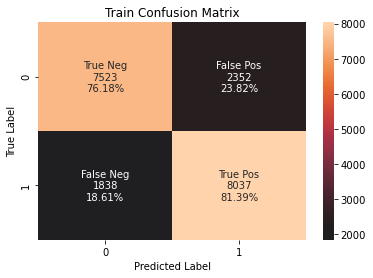

validation loss:0.42627009749412537 accuracy:0.8206556333545513
0.7856461


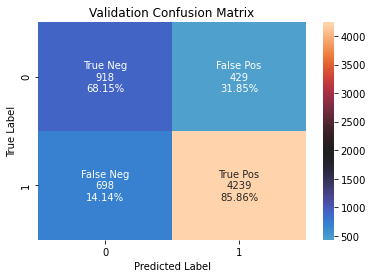

date:180327, rec:002, time:5904.0, label:1.0
Original data 62 CH


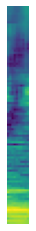

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH49_REDUCEsum.pt


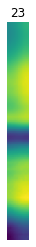

train loss:0.5375528335571289 accuracy:0.7883544303797468
0.5


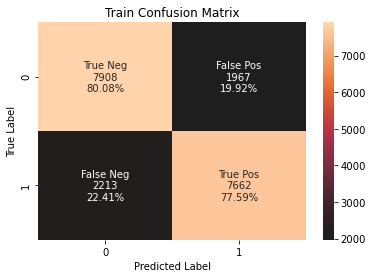

validation loss:0.44165438413619995 accuracy:0.8367281985996181
0.7856461


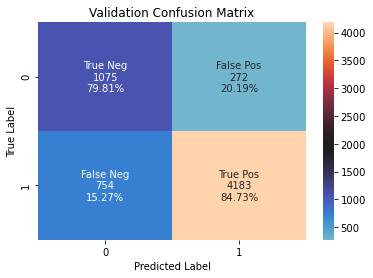

date:180327, rec:002, time:5904.0, label:1.0
Original data 62 CH


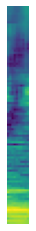

In [19]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### SVM without regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [15]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5633243322372437
Val loss for epoch 0: 0.6515001654624939
Train loss for epoch 1: 0.5354222655296326
Val loss for epoch 1: 0.6230804324150085
1
Train loss for epoch 2: 0.5250371098518372
Val loss for epoch 2: 0.5986531376838684
2
Train loss for epoch 3: 0.5187399387359619
Val loss for epoch 3: 0.6033577919006348
Train loss for epoch 4: 0.516137421131134
Val loss for epoch 4: 0.6111773252487183
Train loss for epoch 5: 0.5122883915901184
Val loss for epoch 5: 0.5754786133766174
5
Train loss for epoch 6: 0.5103127360343933
Val loss for epoch 6: 0.5845819711685181
Train loss for epoch 7: 0.5089962482452393
Val loss for epoch 7: 0.6389201879501343
Train loss for epoch 8: 0.5068846344947815
Val loss for epoch 8: 0.609408438205719
Train loss for epoch 9: 0.5067763924598694
Val loss for epoch 9: 0.5766943097114563
Train loss for epoch 10: 0.5029414892196655
Val loss for epoch 10: 0.6333111524581909
Train loss for epoch 11: 0.5027903914451599
Val loss for epoch 11: 0.6

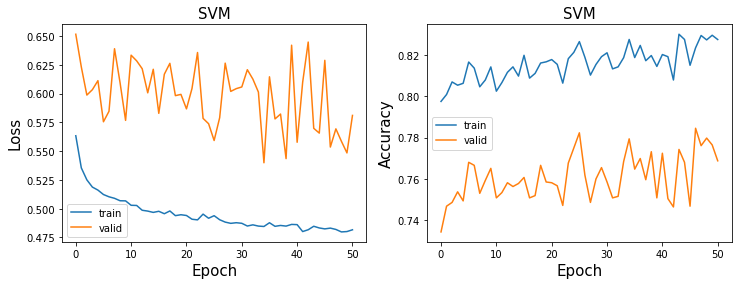

In [16]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 34

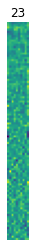

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7474792003631592 accuracy:0.6978461538461539


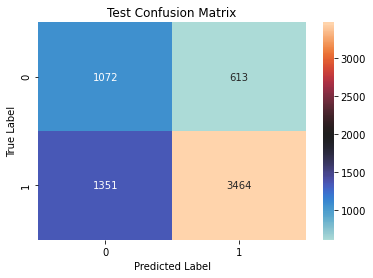

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


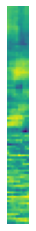

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_3[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

### SVM with finite difference regularization